In [1]:
%cd ..

/Users/ishamrashik/Desktop/machine-learning-and-ai-projects/community-mcp-session/aws_community_day/youtube-sentiment-insights


In [2]:
from data_handling import download_and_copy_dataset, preprocess_comment, feature_engineering, split_data
from utilities import save_data
from utilities import INTERIM_DATA_PATH
import pandas as pd

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ishamrashik/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ishamrashik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ishamrashik/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Data Ingestion

In [3]:
dataset_path = download_and_copy_dataset()

2025-10-12 02:18:08,716 - data_ingestion - DEBUG - Dataset downloaded and copied successfully to data/raw


✓ Dataset downloaded successfully!
Cache location: /Users/ishamrashik/.cache/kagglehub/datasets/atifaliak/youtube-comments-dataset/versions/1

Copying files to data/raw/...
  ✓ YoutubeCommentsDataSet.csv (3.33 MB)
✓ Successfully copied 1 file(s)

Dataset saved to: /Users/ishamrashik/Desktop/machine-learning-and-ai-projects/community-mcp-session/aws_community_day/youtube-sentiment-insights/data/raw
CSV file found: data/raw/YoutubeCommentsDataSet.csv


In [4]:
df = pd.read_csv(dataset_path)
df

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive
...,...,...
18403,i really like the point about engineering tool...,positive
18404,i’ve just started exploring this field and thi...,positive
18405,excelente video con una pregunta filosófica pr...,neutral
18406,hey daniel just discovered your channel a coup...,positive


## Train, Validation and Test Split

In [5]:
train_data, val_data, test_data = split_data(df, stratify_column='Sentiment')

2025-10-12 02:18:08,768 - data_preprocessing - DEBUG - Starting data split with test_size=0.2, val_size=0.1, random_state=42
2025-10-12 02:18:08,782 - data_preprocessing - DEBUG - Data split completed successfully:
2025-10-12 02:18:08,782 - data_preprocessing - DEBUG -   - Train set: 12885 samples (70.00%)
2025-10-12 02:18:08,783 - data_preprocessing - DEBUG -   - Validation set: 1841 samples (10.00%)
2025-10-12 02:18:08,783 - data_preprocessing - DEBUG -   - Test set: 3682 samples (20.00%)


In [6]:
train_data

,Comment,Sentiment
4798,040 grandmaster vs computer super blue first p...,negative
17320,thank you so much i am so happy i found your c...,positive
4632,hope lichess remains as the forbidden platform...,neutral
1327,maguire needs a standing ovation for staying o...,positive
16856,shilpa was absolutely hilarious in this film o...,positive
...,...,...
4803,35000 awkwardthe interview is happening with t...,negative
13715,it’s really interesting to think about how an ...,positive
3091,me follows steps perfectly and slowly and succ...,positive
9364,lets just take a moment to appreciate the time...,positive


## Data Pre-processing and Feature Engineering

In [7]:
train_df = feature_engineering(train_data, preprocess_comment)
val_df = feature_engineering(val_data, preprocess_comment)
test_df = feature_engineering(test_data, preprocess_comment)


2025-10-12 02:18:10,608 - data_preprocessing - DEBUG - Feature engineering completed
2025-10-12 02:18:10,750 - data_preprocessing - DEBUG - Feature engineering completed
2025-10-12 02:18:11,034 - data_preprocessing - DEBUG - Feature engineering completed


In [8]:
train_df['category'].value_counts()

category
1    7799
0    3048
2    1625
Name: count, dtype: int64

In [9]:
val_df['category'].value_counts()

category
1    1123
0     431
2     233
Name: count, dtype: int64

In [10]:
test_df['category'].value_counts()

category
1    2262
0     897
2     467
Name: count, dtype: int64

## Saving the dataset

In [11]:
save_data(train_df, val_df, test_df, INTERIM_DATA_PATH)

2025-10-12 02:18:11,082 - model_building - DEBUG - Processed data saved to data/interim


## Instantiating MLflow

In [12]:
# Test mlflow

import mlflow
import os 

# Set AWS credentials (replace with your actual credentials)
os.environ['AWS_ACCESS_KEY_ID'] = os.getenv('AWS_ACCESS_KEY_ID')
os.environ['AWS_SECRET_ACCESS_KEY'] = os.getenv('AWS_SECRET_ACCESS_KEY')
os.environ['AWS_DEFAULT_REGION'] = os.getenv('AWS_DEFAULT_REGION')

# Then set MLflow tracking URI
mlflow.set_tracking_uri("http://3.29.137.20:5000")

with mlflow.start_run():
    mlflow.log_param("param1", 15)
    mlflow.log_metric("metric1", 0.89)

🏃 View run beautiful-finch-204 at: http://3.29.137.20:5000/#/experiments/0/runs/553e7440e15240a49147366b6b618c79
🧪 View experiment at: http://3.29.137.20:5000/#/experiments/0


In [13]:
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Step 1: Vectorize the comments using Bag of Words (CountVectorizer)
vectorizer = CountVectorizer(max_features=10000)  # Bag of Words model with a limit of 1000 features

In [15]:
train_df


,word_count,num_stop_words,num_chars,clean_comment,num_chars_cleaned,category
4798,29,7,170,040 grandmaster v computer super blue first pl...,144,2
17320,112,55,579,thank much happy found channel software engine...,381,1
4632,27,11,157,hope lichess remains forbidden platform sell o...,113,0
1327,19,8,104,maguire need standing ovation staying one god ...,75,1
16856,21,6,138,shilpa absolutely hilarious film outstanding p...,114,1
...,...,...,...,...,...,...
4803,34,15,197,35000 awkwardthe interview happening sponsor c...,135,2
13715,48,28,253,really interesting think animal around literal...,134,1
3091,20,9,105,follows step perfectly slowly succeeds also ok...,69,1
9364,21,10,107,let take moment appreciate time hunni take mak...,69,1


In [16]:
# Step 1: Vectorize the text comments (Bag of Words)
X_train_text = vectorizer.fit_transform(train_df['clean_comment']).toarray()
X_val_text = vectorizer.transform(val_df['clean_comment']).toarray()

# Step 2: Extract numerical features
# Define the numerical feature columns to include
numerical_features = ['word_count', 'num_stop_words', 'num_chars', 'num_chars_cleaned']

X_train_numerical = train_df[numerical_features].values
X_val_numerical = val_df[numerical_features].values

# Step 3: Combine text features with numerical features
import numpy as np

X_train = np.hstack([X_train_text, X_train_numerical])
X_val = np.hstack([X_val_text, X_val_numerical])

# Target variable
y_train = train_df['category']
y_val = val_df['category']

print(f"✓ Text features shape: {X_train_text.shape}")
print(f"✓ Numerical features shape: {X_train_numerical.shape}")
print(f"✓ Combined features shape: {X_train.shape}")
print(f"✓ Total features: {X_train.shape[1]} (Text: {X_train_text.shape[1]}, Numerical: {X_train_numerical.shape[1]})")

✓ Text features shape: (12472, 10000)
✓ Numerical features shape: (12472, 4)
✓ Combined features shape: (12472, 10004)
✓ Total features: 10004 (Text: 10000, Numerical: 4)


In [17]:
X_train


array([[  0,   0,   0, ...,   7, 170, 144],
       [  0,   0,   0, ...,  55, 579, 381],
       [  0,   0,   0, ...,  11, 157, 113],
       ...,
       [  0,   0,   0, ...,   9, 105,  69],
       [  0,   0,   0, ...,  10, 107,  69],
       [  0,   0,   0, ...,   7,  60,  33]], shape=(12472, 10004))

In [18]:
y_train

4798     2
17320    1
4632     0
1327     1
16856    1
        ..
4803     2
13715    1
3091     1
9364     1
15475    2
Name: category, Length: 12472, dtype: int64

In [19]:
# Set or create an experiment
mlflow.set_experiment("RF Baseline Model")

<Experiment: artifact_location='s3://mlflow-artifacts-5fb77f1c/207194973073877902', creation_time=1760220538108, experiment_id='207194973073877902', last_update_time=1760220538108, lifecycle_stage='active', name='RF Baseline Model', tags={'mlflow.experimentKind': 'custom_model_development'}>

2025/10/12 02:18:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/12 02:18:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForest_Baseline_TrainTestSplit at: http://3.29.137.20:5000/#/experiments/207194973073877902/runs/b87d8ad0648c449bb18972446802a316
🧪 View experiment at: http://3.29.137.20:5000/#/experiments/207194973073877902
Accuracy: 0.6401790710688304


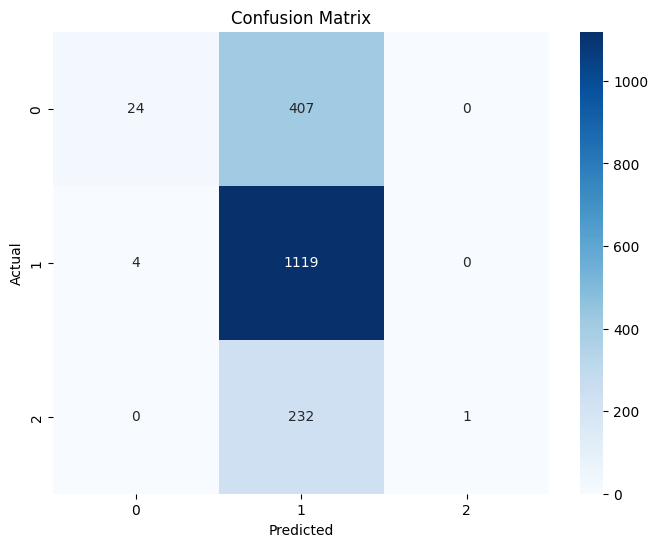

In [20]:
# Step 2: Define and train a Random Forest baseline model using a simple train-test split
with mlflow.start_run() as run:
    # Log a description for the run
    mlflow.set_tag("mlflow.runName", "RandomForest_Baseline_TrainTestSplit")
    mlflow.set_tag("experiment_type", "baseline")
    mlflow.set_tag("model_type", "RandomForestClassifier")

    # Add a description
    mlflow.set_tag("description", "Baseline RandomForest model for sentiment analysis using Bag of Words (BoW) with a simple train-validation split")

    # Log parameters for the vectorizer
    mlflow.log_param("vectorizer_type", "CountVectorizer")
    mlflow.log_param("vectorizer_max_features", vectorizer.max_features)
    
    # Log feature information
    mlflow.log_param("text_features", X_train_text.shape[1])
    mlflow.log_param("numerical_features", X_train_numerical.shape[1])
    mlflow.log_param("total_features", X_train.shape[1])
    mlflow.log_param("numerical_feature_names", ", ".join(numerical_features))

    # Log Random Forest parameters
    n_estimators = 200
    max_depth = 15

    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)

    # Initialize and train the model
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_val)

    # Log metrics for each class and accuracy
    accuracy = accuracy_score(y_val, y_pred)
    mlflow.log_metric("accuracy", accuracy)

    classification_rep = classification_report(y_val, y_pred, output_dict=True)

    for label, metrics in classification_rep.items():
        if isinstance(metrics, dict):  # For precision, recall, f1-score, etc.
            for metric, value in metrics.items():
                mlflow.log_metric(f"{label}_{metric}", value)

    # Confusion matrix plot
    conf_matrix = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")

    # Log the Random Forest model
    mlflow.sklearn.log_model(model, "random_forest_model")

# Display final accuracy
print(f"Accuracy: {accuracy}")

In [22]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.06      0.10       431
           1       0.64      1.00      0.78      1123
           2       1.00      0.00      0.01       233

    accuracy                           0.64      1787
   macro avg       0.83      0.35      0.30      1787
weighted avg       0.74      0.64      0.51      1787



In [21]:
# Prepare test set with the same feature engineering approach
# This will be useful when you want to evaluate on the test set

X_test_text = vectorizer.transform(test_df['clean_comment']).toarray()
X_test_numerical = test_df[numerical_features].values
X_test = np.hstack([X_test_text, X_test_numerical])
y_test = test_df['category']

print(f"✓ Test set prepared with {X_test.shape[1]} features")
print(f"✓ Test samples: {X_test.shape[0]}")


✓ Test set prepared with 10004 features
✓ Test samples: 3626
